In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['axes.labelsize'] = 14   # x/y axis labels
plt.rcParams['legend.fontsize'] = 12  # legend
plt.rcParams['xtick.labelsize'] = 13  # x ticks
plt.rcParams['ytick.labelsize'] = 13  # y ticks


In [4]:
DeltaKappa = [ #coupling ratio variance
    "SweepData_0.5_0.01_1000_10x10.txt",
    "SweepData_0.5_0.03_1000_10x10.txt",
    "SweepData_0.5_0.05_1000_10x10.txt",
    "SweepData_0.5_0.07_1000_10x10.txt",
    "SweepData_0.5_0.09_1000_10x10.txt",
]
Kappa0 = [ #coupling ratio variance
    "SweepData_Nominal0.1_1000_10x10.txt",#Norminal coupling ratio variance
    "SweepData_Nominal0.3_1000_10x10.txt",
    "SweepData_0.5_0.05_1000_10x10.txt",
    "SweepData_Nominal0.7_1000_10x10.txt",
    "SweepData_Nominal0.9_1000_10x10.txt",

]
N = [ #coupling ratio variance
    
    "SweepData_0.5_0.05_1000_4x4.txt",
    "SweepData_0.5_0.05_1000_6x6.txt",
    "SweepData_0.5_0.05_1000_8x8.txt",
    "SweepData_0.5_0.05_1000_10x10.txt"
]
DeltaKappa_df = {
    "std_db": [0] * 5,
    "max_var_db": [0] * 5,
    "DeltaKappa": [0.01, 0.03, 0.05, 0.07, 0.09]
}
Kappa0_df={
    "std_db": [0] * 5,
    "max_var_db": [0] * 5,
    "Kappa0": [0.1, 0.3, 0.5, 0.7, 0.9]
}
N_df = {
    "std_db": [0] * 4,
    "max_var_db": [0] * 4,
    "N": [4, 6, 8, 10]
}
DeltaKappa_df = pd.DataFrame(DeltaKappa_df)
Kappa0_df = pd.DataFrame(Kappa0_df)
N_df = pd.DataFrame(N_df)

def db_to_watts(db_values):
    return 10 ** (db_values / 10)

def watts_to_db(watts_values):
    return 10 * np.log10(watts_values)

def load_and_process_data(file_path):
    # Load dataset assuming it is a CSV file
    data = pd.read_csv(file_path, sep='\s+', header=None)

    # Convert dB to watts for calculations
    data_watts = db_to_watts(data)
    port10 = data_watts.iloc[:, -1]
    mean_port10 = port10.mean()
    std_port10 = port10.std()

    # Calculate mean and standard deviation in watts
    mean_watts = data_watts.mean(axis=0)
    print(mean_watts)
    # Convert mean and bounds back to dB
    mean_db = watts_to_db(mean_watts)
    std_db = mean_db.std(axis=0)

    #Calculate largest variance in port 10
    upper_bound_db = watts_to_db(mean_port10 + std_port10)
    lower_bound_db = watts_to_db(mean_port10 - std_port10)
    max_var_db=upper_bound_db-lower_bound_db
    return std_db, max_var_db
for i, dataset_path in enumerate(DeltaKappa):
    DeltaKappa_df.iloc[i, 0], DeltaKappa_df.iloc[i,1]= load_and_process_data(dataset_path)
for i, dataset_path in enumerate(Kappa0):
    Kappa0_df.iloc[i, 0], Kappa0_df.iloc[i,1]= load_and_process_data(dataset_path)
for i, dataset_path in enumerate(N):
    N_df.iloc[i, 0], N_df.iloc[i,1]= load_and_process_data(dataset_path)

<>:50: SyntaxWarning: invalid escape sequence '\s'
<>:50: SyntaxWarning: invalid escape sequence '\s'
C:\Users\julia_16waa\AppData\Local\Temp\ipykernel_85408\509763657.py:50: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(file_path, sep='\s+', header=None)
C:\Users\julia_16waa\AppData\Local\Temp\ipykernel_85408\509763657.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.906835582134786' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DeltaKappa_df.iloc[i, 0], DeltaKappa_df.iloc[i,1]= load_and_process_data(dataset_path)
C:\Users\julia_16waa\AppData\Local\Temp\ipykernel_85408\509763657.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.808343872593701' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DeltaKappa_df.iloc

0    0.071324
1    0.165210
2    0.456379
3    0.498928
4    1.690832
5    1.687786
6    0.497846
7    0.456984
8    0.166166
9    0.071995
dtype: float64
0    0.073413
1    0.166985
2    0.455227
3    0.500272
4    1.689596
5    1.689758
6    0.502032
7    0.455873
8    0.166026
9    0.072258
dtype: float64
0    0.075124
1    0.169169
2    0.453340
3    0.503413
4    1.691166
5    1.685213
6    0.501705
7    0.456694
8    0.170256
9    0.074203
dtype: float64
0    0.080211
1    0.174305
2    0.458960
3    0.498090
4    1.674093
5    1.672221
6    0.505761
7    0.457998
8    0.173266
9    0.081380
dtype: float64
0    0.082533
1    0.177519
2    0.457676
3    0.502019
4    1.664996
5    1.657154
6    0.503766
7    0.457047
8    0.180104
9    0.084731
dtype: float64
0    0.137138
1    0.562198
2    1.055205
3    0.654074
4    0.520181
5    0.523036
6    0.656803
7    1.056826
8    0.560204
9    0.136387
dtype: float64
0    0.094231
1    0.260221
2    0.585073
3    0.768170
4    1.180667


C:\Users\julia_16waa\AppData\Local\Temp\ipykernel_85408\509763657.py:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.25567021993736' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  N_df.iloc[i, 0], N_df.iloc[i,1]= load_and_process_data(dataset_path)
C:\Users\julia_16waa\AppData\Local\Temp\ipykernel_85408\509763657.py:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9640171143868255' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  N_df.iloc[i, 0], N_df.iloc[i,1]= load_and_process_data(dataset_path)


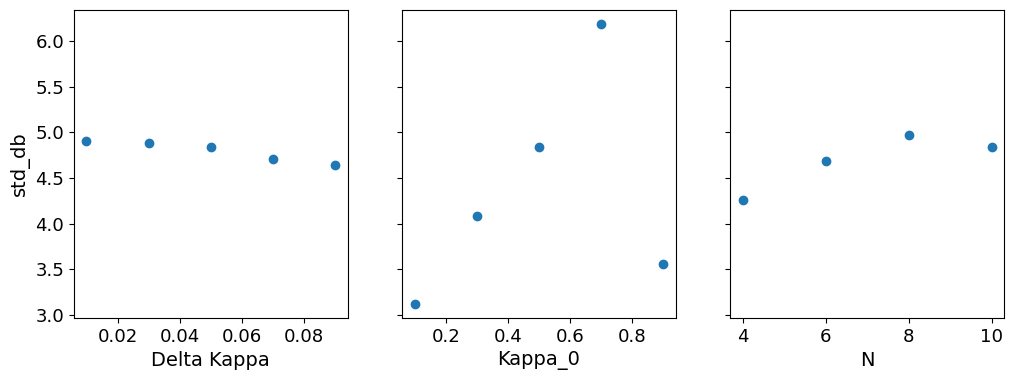

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12, 4))
ax1.scatter(DeltaKappa_df["DeltaKappa"], DeltaKappa_df['std_db'])
ax1.set_xlabel("Delta Kappa")
ax1.set_ylabel("std_db")

ax2.scatter(Kappa0_df["Kappa0"], Kappa0_df['std_db'])
ax2.set_xlabel("Kappa_0")

ax3.scatter(N_df["N"],N_df["std_db"])
ax3.set_xlabel("N")
plt.savefig("Empirial formula 1.png",dpi=300, bbox_inches='tight')

In [6]:
'''import statsmodels.api as sm
y = Kappa['std_db']
X = sm.add_constant(Kappa[['DeltaKappa', 'Kappa_0','N']])
model_std_db = sm.OLS( y, X).fit()
model_std_db.summary()'''

"import statsmodels.api as sm\ny = Kappa['std_db']\nX = sm.add_constant(Kappa[['DeltaKappa', 'Kappa_0','N']])\nmodel_std_db = sm.OLS( y, X).fit()\nmodel_std_db.summary()"

In [7]:
'''y = Kappa['max_var_db']
model_max_var = sm.OLS( y, X).fit()
model_max_var.summary()'''

"y = Kappa['max_var_db']\nmodel_max_var = sm.OLS( y, X).fit()\nmodel_max_var.summary()"

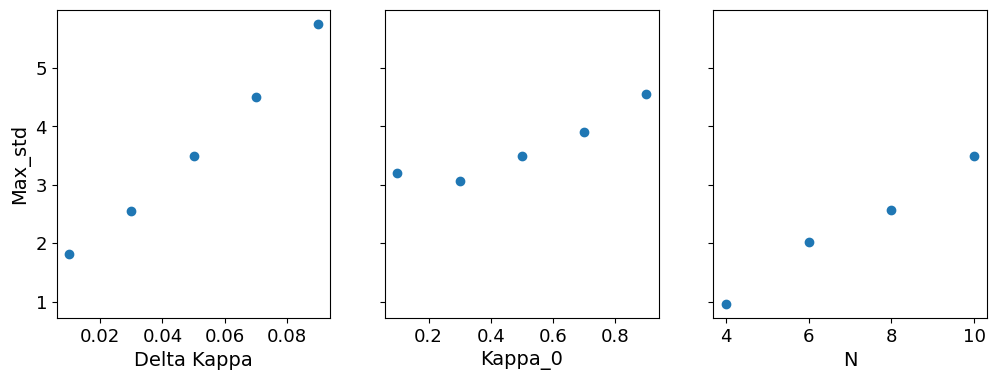

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12, 4))
ax1.scatter(DeltaKappa_df["DeltaKappa"], DeltaKappa_df['max_var_db'])
ax1.set_xlabel("Delta Kappa")
ax1.set_ylabel("Max_std")

ax2.scatter(Kappa0_df["Kappa0"], Kappa0_df['max_var_db'])
ax2.set_xlabel("Kappa_0")

ax3.scatter(N_df["N"],N_df['max_var_db'])
ax3.set_xlabel("N")
plt.savefig("Empirial formula 2.png",dpi=300, bbox_inches='tight')

In [9]:
print(load_and_process_data("SweepData_Nom0.02_0.05_loss0.5_1000_10x10.txt"))

0    0.412318
1    0.770195
2    0.666741
3    0.561600
4    0.566237
5    0.559546
6    0.552387
7    0.672527
8    0.774026
9    0.407708
dtype: float64
(0.9721365771031202, 1.780957663273743)


In [10]:
print(load_and_process_data("SweepData_Nom0.98_0.05_loss0.5_1000_10x10.txt"))

0    0.116752
1    1.231653
2    0.304223
3    0.751480
4    0.489630
5    0.499205
6    0.753436
7    0.303760
8    1.250817
9    0.119869
dtype: float64
(3.684798168025708, 6.121328187617746)
